In [77]:
#Importing required packages.
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
%matplotlib inline

In [78]:
data= pd.read_csv("winequality-red.csv")

In [79]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [81]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


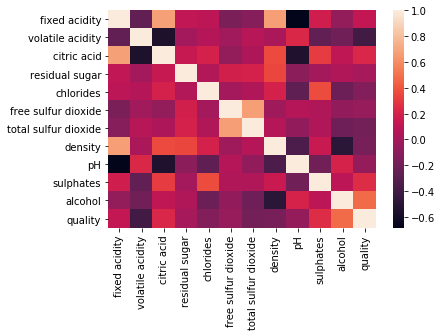

In [82]:
sns.heatmap(data.corr())

In [83]:
data.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

## There is no effect of fixed acidity on quality

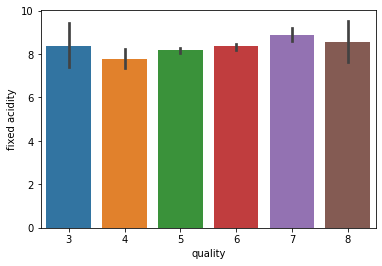

In [17]:
plt.figure()
plt.ylabel('fixed acidity')
plt.xlabel('quality')
sns.barplot(data['quality'],data['fixed acidity'])

## We see a downing trend. As quality increases, the volatile acidity decreases.

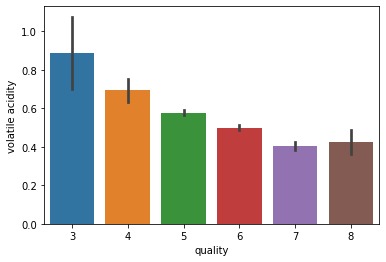

In [23]:
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

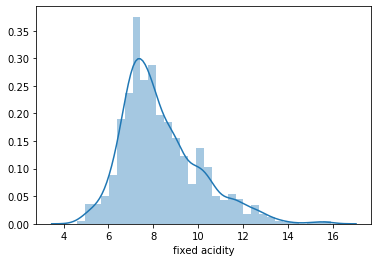

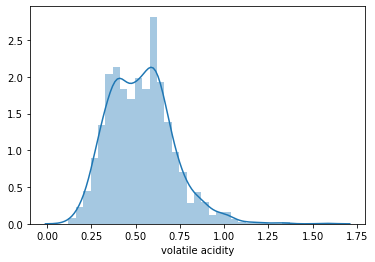

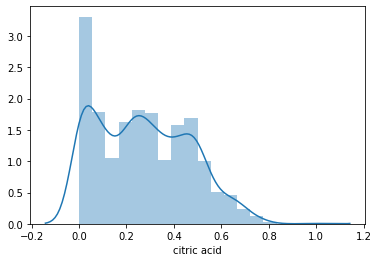

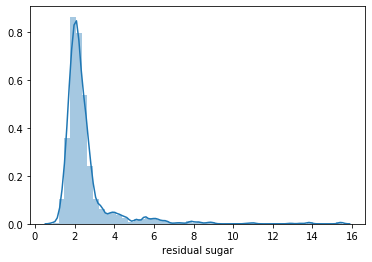

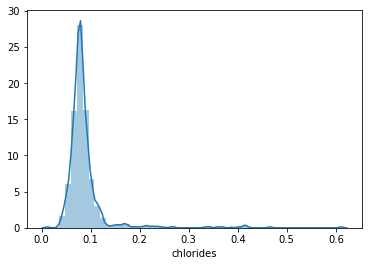

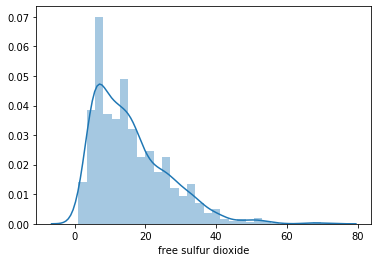

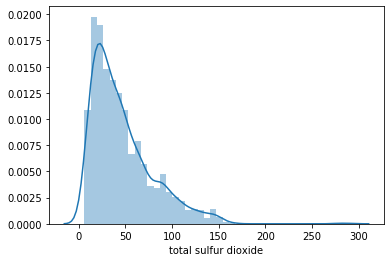

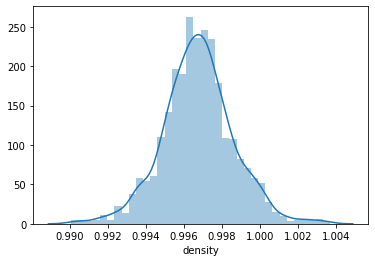

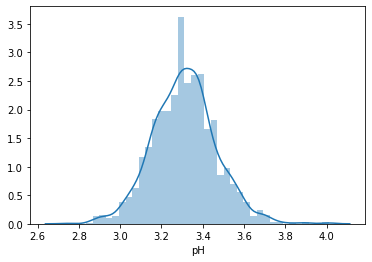

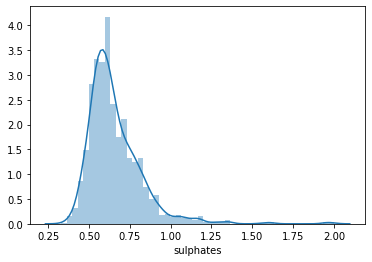

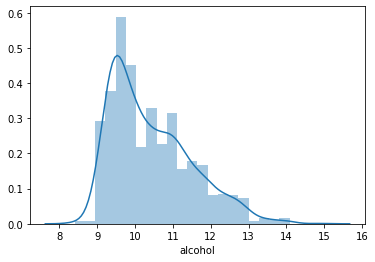

In [8]:
for i in data.columns[:-1]:
    plt.figure()
    sns.distplot(data[i])

In [84]:
data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [85]:
lognorm= ['free sulfur dioxide', 'total sulfur dioxide','alcohol','citric acid']

## Applying log tranformations to skewed curves`

In [133]:
for i in lognorm:
    data[i]= np.log(1+data[i])

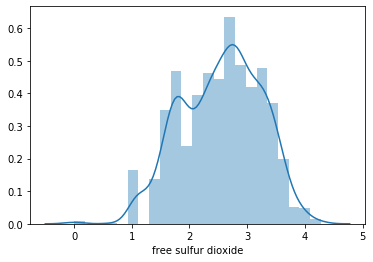

In [54]:
sns.distplot(data['free sulfur dioxide'])

## As citric acid quantity increases, the quality increases 

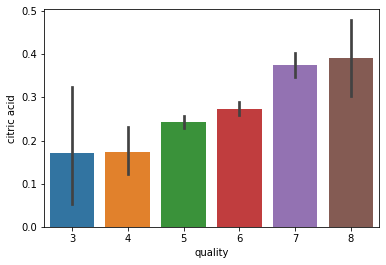

In [30]:
sns.barplot(x = 'quality', y = 'citric acid', data = data)

## Residual sugar doesn't have much of an affect on the quality of wine 

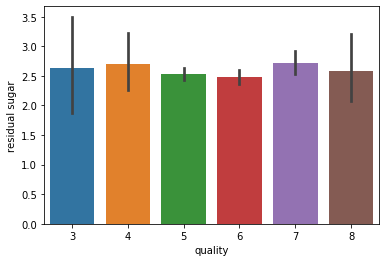

In [32]:
sns.barplot(x = 'quality', y = 'residual sugar', data = data)

In [34]:
## Composition of chloride goes down as we go up in wine quality

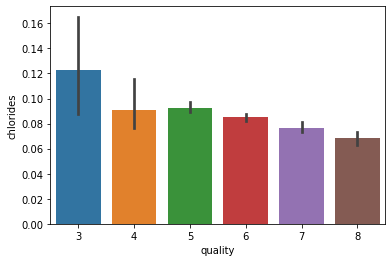

In [35]:
sns.barplot(x = 'quality', y = 'chlorides', data = data)

In [37]:
plots= ['free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'

## It can be observed from plots below that-
### - As quality increases, quantity of sulphates also increases
### - As quality goes up, alcohol content also goes up


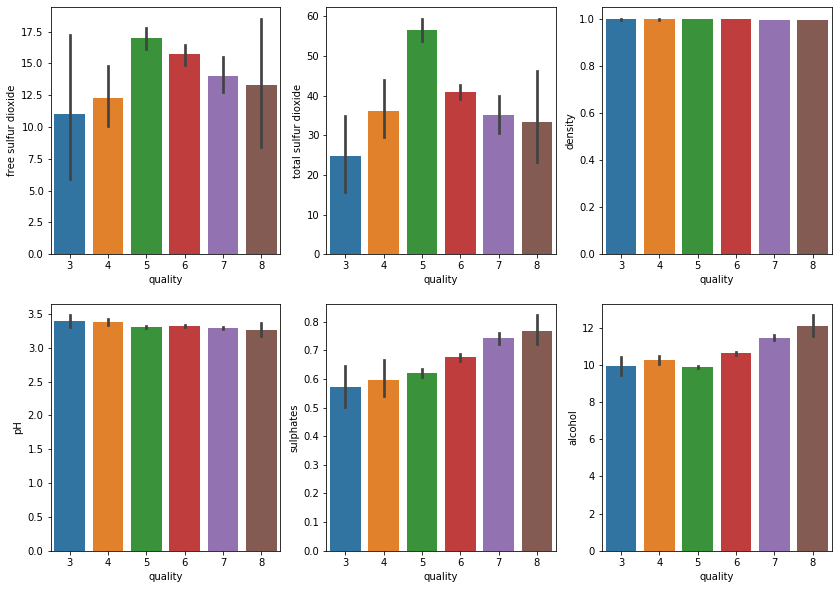

In [51]:
index=1
plt.figure(figsize=(14,10))
for i in plots:
    plt.subplot(2,3,index)
    sns.barplot(x = 'quality', y = i, data = data)
    print()
    index+=1

## Feature Engineering

In [87]:
#Making binary classificaion for the response variable.
#Dividing wine as good and bad by giving the limit for the quality
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
data['quality'] = pd.cut(data['quality'], bins = bins, labels = group_names)

In [89]:
le= LabelEncoder()

In [90]:
data['quality']=le.fit_transform(data['quality'])

In [91]:
data['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

## Here we notice a class imbalance

In [92]:
### So we use upsampling

In [93]:
df_minority= data[data['quality']==1]
df_majority= data[data['quality']==0]

In [94]:
df_majority.shape

(1382, 12)

In [95]:
df_minority.shape

(217, 12)

In [96]:
from sklearn.utils import resample

In [97]:
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1382,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.quality.value_counts()

1    1382
0    1382
Name: quality, dtype: int64

In [98]:
X= df_upsampled.drop('quality',axis=1)

In [99]:
y=df_upsampled['quality']

In [100]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.33, random_state=42)

In [101]:
scaler= StandardScaler()

In [102]:
X_test= scaler.fit_transform(X_test)
X_train= scaler.fit_transform(X_train)

In [113]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [114]:
print(classification_report(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97       468
           1       0.95      0.98      0.97       445

    accuracy                           0.97       913
   macro avg       0.97      0.97      0.97       913
weighted avg       0.97      0.97      0.97       913



In [105]:
sgd = SGDClassifier(penalty=None)
sgd.fit(X_train, y_train)
pred_sgd = sgd.predict(X_test)

In [106]:
print(classification_report(y_test, pred_sgd))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       468
           1       0.71      0.68      0.69       445

    accuracy                           0.71       913
   macro avg       0.71      0.71      0.71       913
weighted avg       0.71      0.71      0.71       913



In [107]:
svc = SVC()
svc.fit(X_train, y_train)
pred_svc = svc.predict(X_test)

In [108]:
print(classification_report(y_test, pred_svc))

              precision    recall  f1-score   support

           0       0.87      0.80      0.84       468
           1       0.81      0.88      0.84       445

    accuracy                           0.84       913
   macro avg       0.84      0.84      0.84       913
weighted avg       0.84      0.84      0.84       913



In [109]:
param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(svc, param_grid=param, scoring='accuracy', cv=10)

In [110]:
grid_svc.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [111]:
grid_svc.best_params_

{'C': 1.3, 'gamma': 1.4, 'kernel': 'rbf'}

In [123]:
svc2 = SVC(C = 1.2, gamma =  0.9, kernel= 'rbf',probability=True)
svc2.fit(X_train, y_train)
pred_svc2 = svc2.predict(X_test)
print(classification_report(y_test, pred_svc2))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       468
           1       0.98      0.98      0.98       445

    accuracy                           0.98       913
   macro avg       0.98      0.98      0.98       913
weighted avg       0.98      0.98      0.98       913



In [124]:
# Cross val score
cross_val_score(svc2,X_test,y_test,cv=10).mean()

0.9441591017677974

In [125]:
from sklearn.metrics import roc_auc_score

## Intuitively, AUROC represents the likelihood of your model distinguishing observations from two classes.

In [126]:
prob_y_2 = svc2.predict_proba(X_test)

In [127]:
prob_y_2

array([[2.00430336e-02, 9.79956966e-01],
       [9.99500484e-01, 4.99516331e-04],
       [1.15428053e-02, 9.88457195e-01],
       ...,
       [9.99765659e-01, 2.34341474e-04],
       [9.97345329e-01, 2.65467065e-03],
       [1.11732277e-02, 9.88826772e-01]])

In [130]:
prob_y_2 = [p[1] for p in prob_y_2]

In [132]:
print(roc_auc_score(y_test,prob_y_2))

0.9922356669547681


##  A good roc_auc score 